In [1]:
from vizdoom import *
import random
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker
from stable_baselines3 import PPO

In [2]:
game = DoomGame()
game.load_config('github_vd/VizDoom/scenarios/basic.cfg')
game.init()

In [3]:
actions = np.identity(3, dtype = np.uint8)

In [4]:
random.choice(actions)

array([1, 0, 0], dtype=uint8)

In [5]:
state = game.get_state()

In [6]:
state.screen_buffer.shape

(3, 240, 320)

In [7]:
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables
        reward = game.make_action(random.choice(actions),4)
        print('reward:',reward)
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)
        

reward: -4.0
reward: 99.0
Result: 95.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: 91.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0

KeyboardInterrupt: 

In [8]:
game.close()

In [3]:
from gym import  Env
from gym.spaces import Discrete,Box
import cv2

In [4]:
class VizDoomGym(Env):
    # Function to start the env
    def __init__(self, render = False):
        
        super().__init__()
        self.game = DoomGame()
        self.game.load_config('github_vd/VizDoom/scenarios/basic.cfg')
        
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
            
        self.game.init()
        
        self.observation_space = Box(low= 0, high = 255, shape = [100,160,1], dtype = np.uint8)
        self.action_space = Discrete(3)
        
    def step(self,action):
        actions = np.identity(3, dtype = np.uint8)
        reward = self.game.make_action(actions[action],4)
        
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else:
            
            state = np.zeros(self.observation_space.shape)
            info = 0
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state,reward,done,info
    
    def render():
        pass
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation,0,-1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray,(160,100), interpolation = cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
        
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    def close(self):
        self.game.close()


In [5]:
env.close()

NameError: name 'env' is not defined

In [6]:
env = VizDoomGym(render = True)

In [7]:
env_checker.check_env(env)

In [9]:
env.close()

In [8]:
state = env.step(2)

In [61]:
state = env.reset()

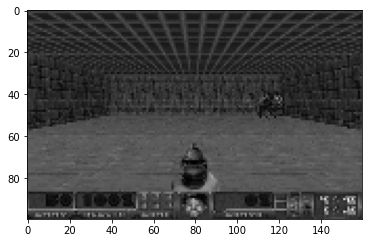

In [16]:
plt.imshow(cv2.cvtColor(state,cv2.COLOR_BGR2RGB))

In [71]:
env.close()

In [10]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self,check_freq,save_path,verbose = 1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok = True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

In [11]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [12]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path = CHECKPOINT_DIR)

In [13]:
env = VizDoomGym()

In [14]:
model = PPO('CnnPolicy',env,tensorboard_log=LOG_DIR,verbose = 1, learning_rate = 0.0001, n_steps = 256)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [77]:
model.learn(total_timesteps = 10000, callback = callback)

Logging to ./logs/log_basic\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30.9     |
|    ep_rew_mean     | -63.6    |
| time/              |          |
|    fps             | 34       |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 256      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 34           |
|    ep_rew_mean          | -83.9        |
| time/                   |              |
|    fps                  | 27           |
|    iterations           | 2            |
|    time_elapsed         | 18           |
|    total_timesteps      | 512          |
| train/                  |              |
|    approx_kl            | 0.0038287095 |
|    clip_fraction        | 0.163        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 34.2        |
|    ep_rew_mean          | -97.1       |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 11          |
|    time_elapsed         | 123         |
|    total_timesteps      | 2816        |
| train/                  |             |
|    approx_kl            | 0.010770079 |
|    clip_fraction        | 0.195       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.885      |
|    explained_variance   | 0.00427     |
|    learning_rate        | 0.0001      |
|    loss                 | 1.97e+03    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00172    |
|    value_loss           | 3.23e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 34.7  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 45.1        |
|    ep_rew_mean          | -156        |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 21          |
|    time_elapsed         | 238         |
|    total_timesteps      | 5376        |
| train/                  |             |
|    approx_kl            | 0.005475589 |
|    clip_fraction        | 0.0191      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.142      |
|    explained_variance   | 0.135       |
|    learning_rate        | 0.0001      |
|    loss                 | 694         |
|    n_updates            | 200         |
|    policy_gradient_loss | 7.28e-05    |
|    value_loss           | 2.08e+03    |
-----------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 47

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 60.3          |
|    ep_rew_mean          | -233          |
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 31            |
|    time_elapsed         | 358           |
|    total_timesteps      | 7936          |
| train/                  |               |
|    approx_kl            | 0.00044556567 |
|    clip_fraction        | 0.00508       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0356       |
|    explained_variance   | 0.129         |
|    learning_rate        | 0.0001        |
|    loss                 | 916           |
|    n_updates            | 300           |
|    policy_gradient_loss | -0.000866     |
|    value_loss           | 1.76e+03      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 72.6          |
|    ep_rew_mean          | -293          |
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 40            |
|    time_elapsed         | 467           |
|    total_timesteps      | 10240         |
| train/                  |               |
|    approx_kl            | 2.3283064e-09 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00749      |
|    explained_variance   | 0.141         |
|    learning_rate        | 0.0001        |
|    loss                 | 534           |
|    n_updates            | 390           |
|    policy_gradient_loss | 3.67e-06      |
|    value_loss           | 1.65e+03      |
-------------------------------------------


KeyboardInterrupt: 

In [80]:
state = env.reset()
while True:
    action, _ = model.predict(state)
    state,reward,done,info = env.step(action)

KeyboardInterrupt: 